# 🎯 Objectif du Projet
## L’objectif est de construire un modèle de classification binaire capable de prédire si un patient souffre d'une maladie cardiaque (target = 1) ou non (target = 0) en fonction de ses données médicales.

In [25]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


In [26]:

df = pd.read_csv("heart.csv")
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


| Colonne    | Description                                                         |
| ---------- | ------------------------------------------------------------------- |
| `age`      | Âge du patient                                                      |
| `sex`      | Sexe (1 = homme, 0 = femme)                                         |
| `cp`       | Type de douleur thoracique (0–3)                                    |
| `trestbps` | Tension artérielle au repos (en mm Hg)                              |
| `chol`     | Taux de cholestérol sérique (en mg/dl)                              |
| `fbs`      | Glycémie à jeun > 120 mg/dl (1 = vrai ; 0 = faux)                   |
| `restecg`  | Résultats de l’électrocardiogramme au repos (0–2)                   |
| `thalach`  | Fréquence cardiaque maximale atteinte                               |
| `exang`    | Angine induite par l'exercice (1 = oui ; 0 = non)                   |
| `oldpeak`  | Dépression du segment ST induite par l'exercice                     |
| `slope`    | Pente du segment ST pendant l’exercice (0–2)                        |
| `ca`       | Nombre de vaisseaux principaux colorés par fluoroscopie (0–3)       |
| `thal`     | Thalassémie (1 = normal, 2 = défaut fixe, 3 = défaut réversible)    |
| `target`   | Présence de maladie cardiaque (1 = oui, 0 = non) ✅ (Variable cible) |


In [27]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [28]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [29]:
df.shape

(1025, 14)

In [30]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# ✅ 2. Prétraitement des données (Data Cleaning)


## **Valeurs manquantes :**


In [31]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## ***2.Suppression des doublons , if exists*** :

In [32]:
df.duplicated().sum()

723

In [33]:
# Afficher le nombre de doublons
print("Nombre de doublons avant suppression : ", df.duplicated().sum())
df_cleaned = df.drop_duplicates()
print("Nombre de doublons après suppression : ", df_cleaned.duplicated().sum())
print("Forme du dataset après suppression : ", df_cleaned.shape)


Nombre de doublons avant suppression :  723
Nombre de doublons après suppression :  0
Forme du dataset après suppression :  (302, 14)


In [34]:
df.shape

(1025, 14)

## ***3.Détection et gestion des valeurs aberrantes***

In [35]:
df.select_dtypes(exclude=['object'])

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [39]:

from scipy import stats

def detect_outliers(df, column):
    z_scores = stats.zscore(df[column].dropna())
    threshold = 3
    outliers = df[column][np.abs(z_scores) > threshold]
    return outliers

# Filtrer uniquement les colonnes de type float ou int
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    try:
        count_outliers = detect_outliers(df, col).count()
        print(f"Colonne {col}: {count_outliers} valeurs aberrantes")
    except Exception as e:
        print(f"Erreur dans la colonne {col} : {e}")


Colonne age: 0 valeurs aberrantes
Colonne sex: 0 valeurs aberrantes
Colonne cp: 0 valeurs aberrantes
Colonne trestbps: 7 valeurs aberrantes
Colonne chol: 13 valeurs aberrantes
Colonne fbs: 0 valeurs aberrantes
Colonne restecg: 0 valeurs aberrantes
Colonne thalach: 4 valeurs aberrantes
Colonne exang: 0 valeurs aberrantes
Colonne oldpeak: 7 valeurs aberrantes
Colonne slope: 0 valeurs aberrantes
Colonne ca: 18 valeurs aberrantes
Colonne thal: 7 valeurs aberrantes
Colonne target: 0 valeurs aberrantes


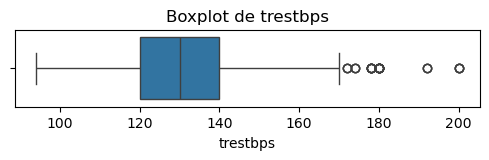

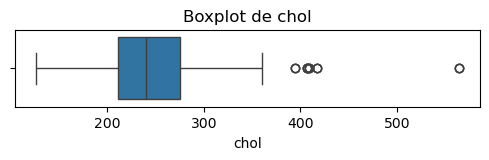

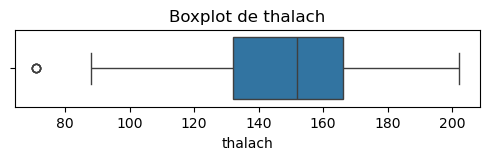

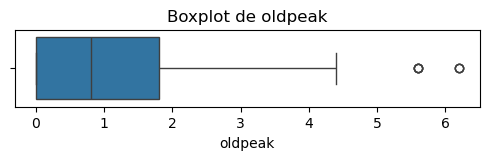

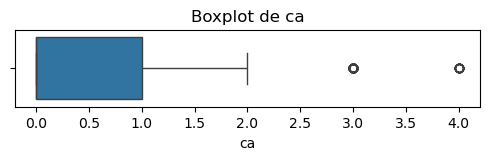

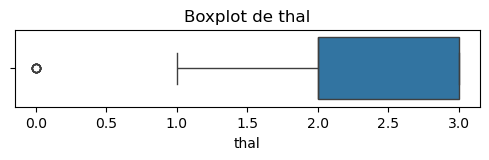

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple : df = pd.read_csv('votre_fichier.csv')

colonnes = ['trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']
for col in colonnes:
    plt.figure(figsize=(6, 1))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot de {col}')
    plt.show()

In [40]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
        print(f"{col}: valeurs gardées entre {lower_bound:.2f} et {upper_bound:.2f}")
    return df_clean

# Colonnes numériques à traiter
colonnes_a_nettoyer = ['trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']

# Nettoyage
df_nettoye = remove_outliers_iqr(df, colonnes_a_nettoyer)


trestbps: valeurs gardées entre 90.00 et 170.00
chol: valeurs gardées entre 115.25 et 369.25
thalach: valeurs gardées entre 79.50 et 219.50
oldpeak: valeurs gardées entre -2.55 et 4.25
ca: valeurs gardées entre -1.50 et 2.50
thal: valeurs gardées entre 0.50 et 4.50


In [41]:

from scipy import stats

def detect_outliers(df, column):
    z_scores = stats.zscore(df[column].dropna())
    threshold = 3
    outliers = df[column][np.abs(z_scores) > threshold]
    return outliers

# Filtrer uniquement les colonnes de type float ou int
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    try:
        count_outliers = detect_outliers(df, col).count()
        print(f"Colonne {col}: {count_outliers} valeurs aberrantes")
    except Exception as e:
        print(f"Erreur dans la colonne {col} : {e}")


Colonne age: 0 valeurs aberrantes
Colonne sex: 0 valeurs aberrantes
Colonne cp: 0 valeurs aberrantes
Colonne trestbps: 7 valeurs aberrantes
Colonne chol: 13 valeurs aberrantes
Colonne fbs: 0 valeurs aberrantes
Colonne restecg: 0 valeurs aberrantes
Colonne thalach: 4 valeurs aberrantes
Colonne exang: 0 valeurs aberrantes
Colonne oldpeak: 7 valeurs aberrantes
Colonne slope: 0 valeurs aberrantes
Colonne ca: 18 valeurs aberrantes
Colonne thal: 7 valeurs aberrantes
Colonne target: 0 valeurs aberrantes


In [42]:
print(f"Lignes avant : {len(df)}, après nettoyage : {len(df_nettoye)}")

Lignes avant : 1025, après nettoyage : 881


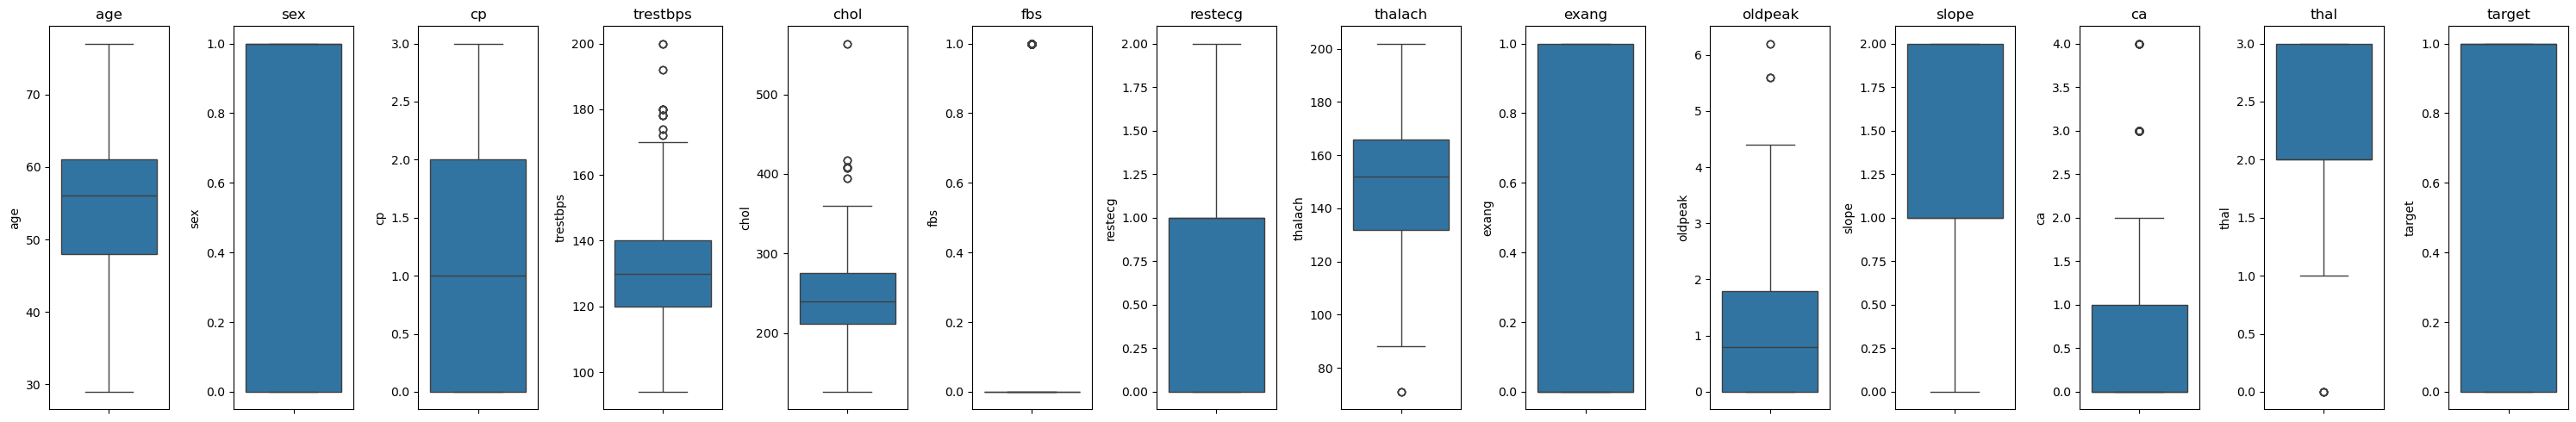

In [43]:
plt.figure(figsize=(30, 5))  # Ajuste la taille du graphique

for i, col in enumerate(df.select_dtypes(include='number').columns, 1,):
    plt.subplot(1, len(df.columns), i)  # Crée des sous-graphiques côte à côte
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()  # Ajuste les espacements
plt.show()

In [44]:
Q1 = df['trestbps'].quantile(0.25)  
Q3 = df['trestbps'].quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

In [45]:
Q1 = df['chol'].quantile(0.25)  
Q3 = df['chol'].quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

In [46]:
Q1 = df['thalach'].quantile(0.25)  
Q3 = df['thalach'].quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

In [47]:
Q1 = df['slope'].quantile(0.25)  
Q3 = df['slope'].quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

In [48]:
Q1 = df['ca'].quantile(0.25)  
Q3 = df['ca'].quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR  

In [49]:

Q1 = df['thal'].quantile(0.25)  
Q3 = df['thal'].quantile(0.75)  
IQR = Q3 - Q1  
lower_bound = Q1 - 1.5 * IQR  
upper_bound = Q3 + 1.5 * IQR 

In [51]:
print(f"Lignes avant : {len(df)}, après nettoyage : {len(df_nettoye)}")

Lignes avant : 1025, après nettoyage : 881


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

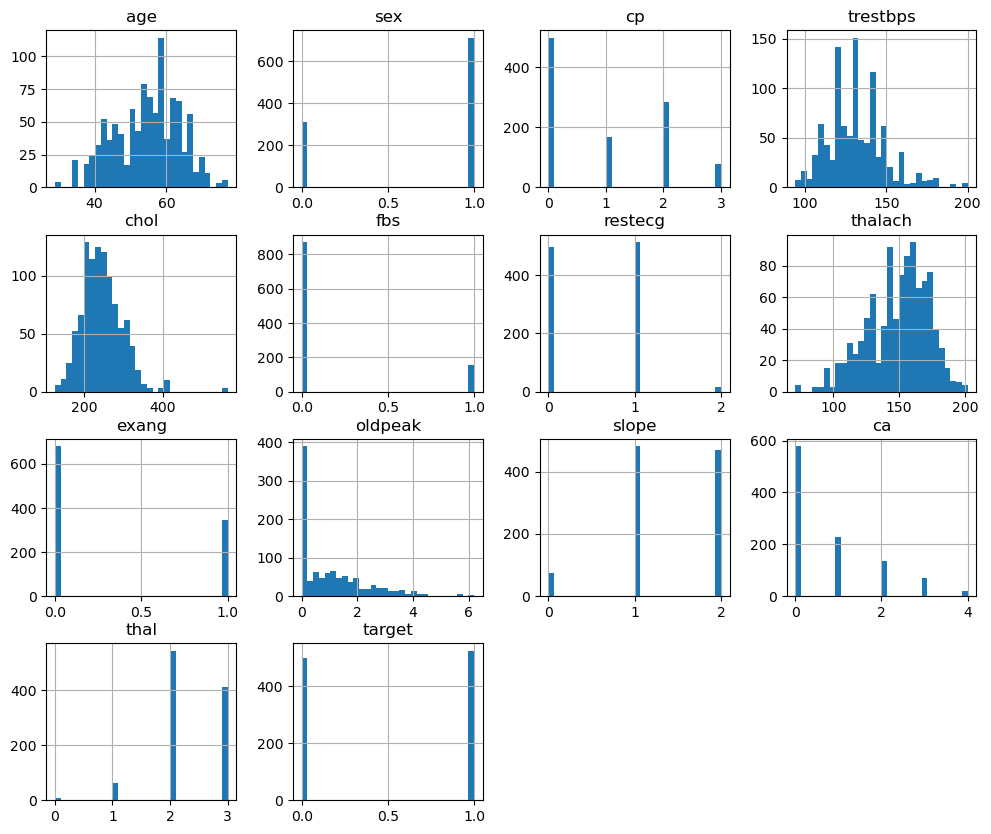

In [53]:
df.hist(bins=30, figsize=(12,10))

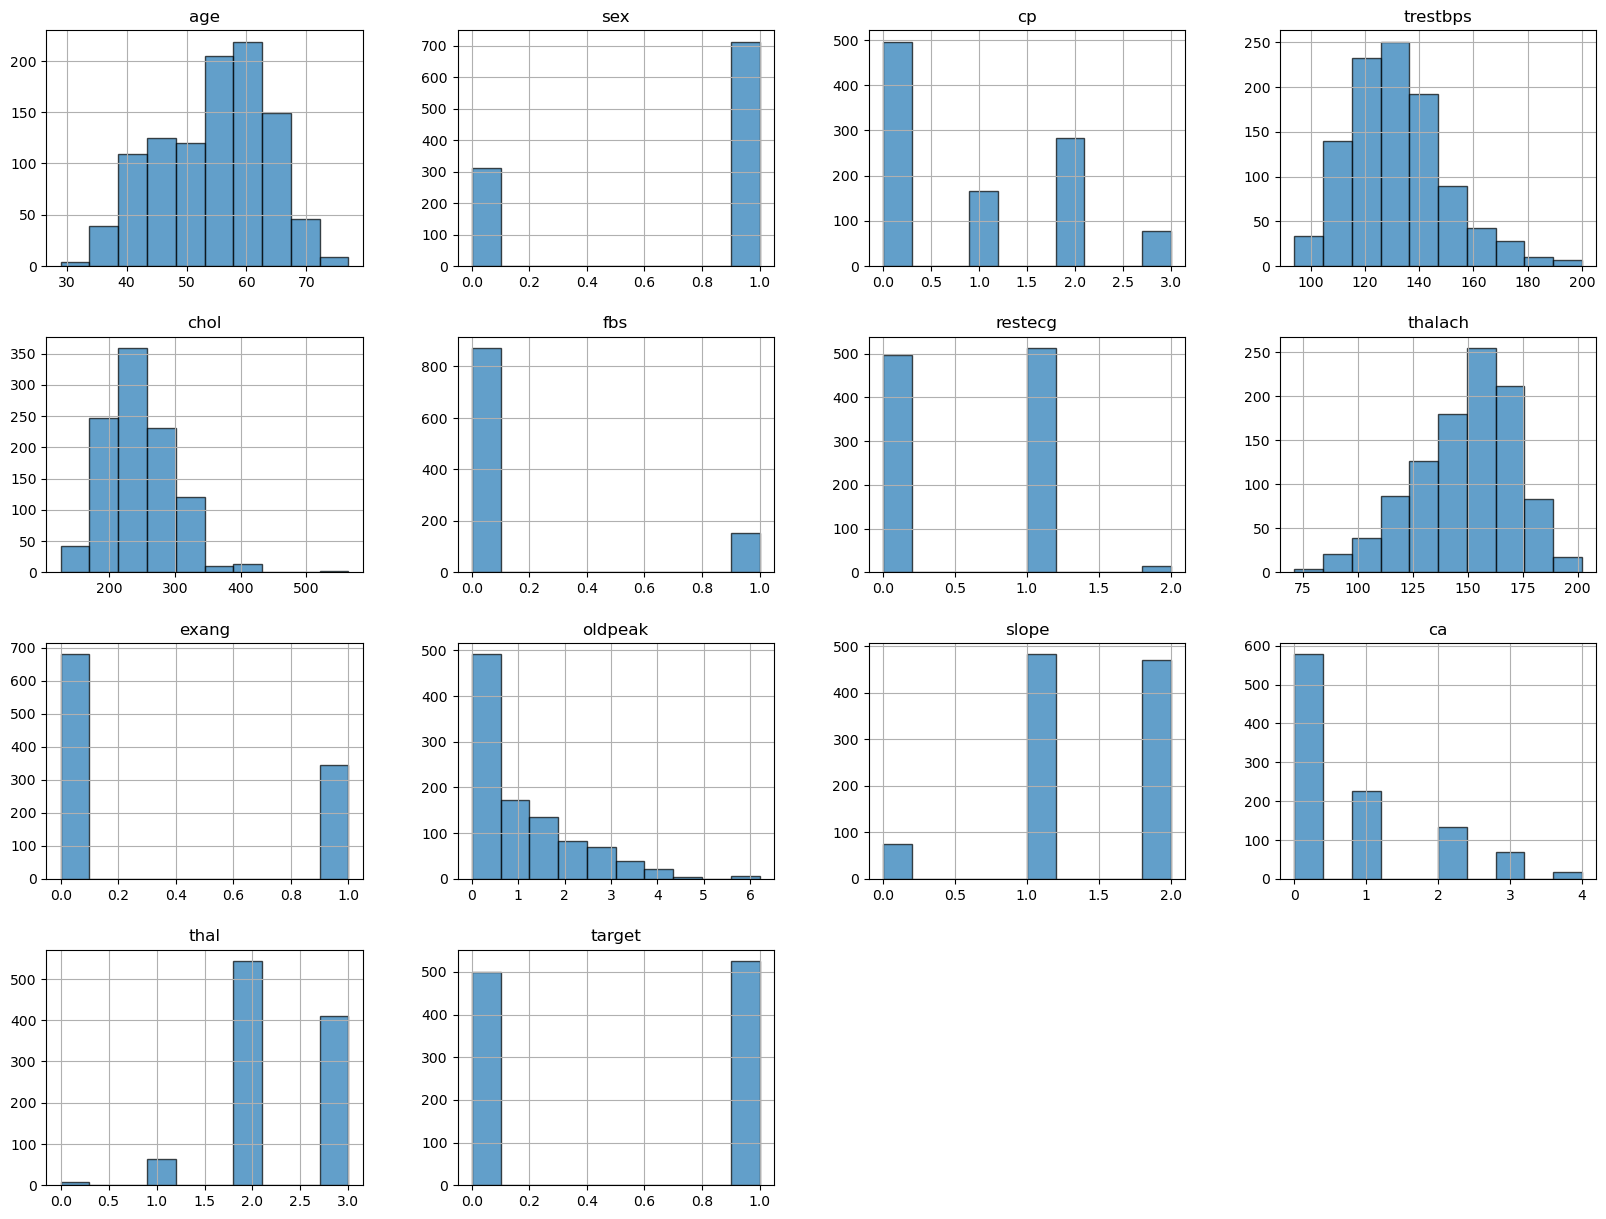

In [52]:
df.hist(edgecolor='black', alpha=0.7 , figsize=(20,15))
plt.show()

# ✅ 3. Normalisation / Standardisation

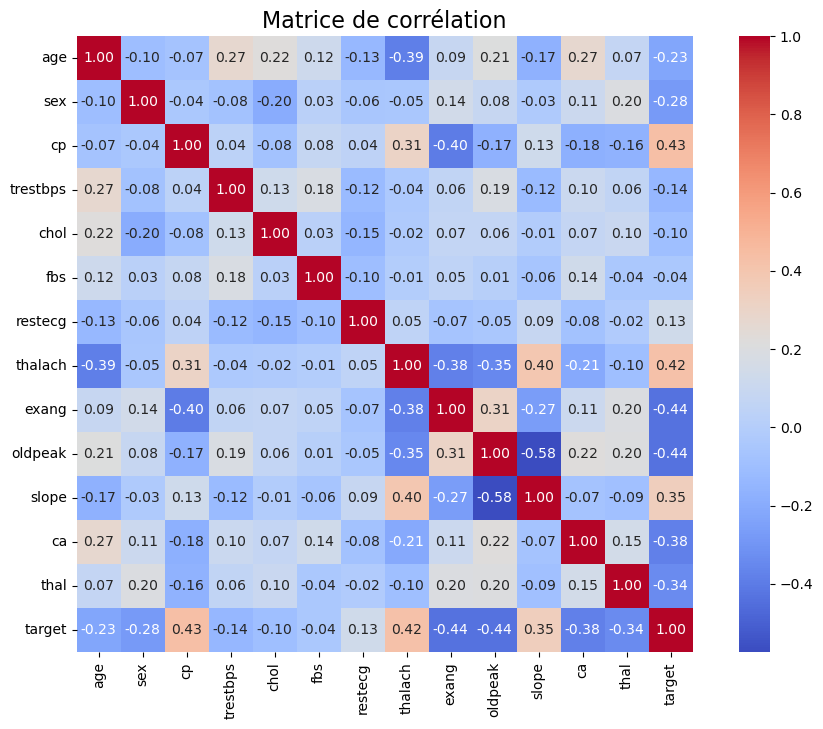

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Matrice de corrélation", fontsize=16)
plt.show()

# ***Partie 2  : modele machine learning :***

# Regression logistic

In [181]:
from imblearn.over_sampling import SMOTE

In [182]:

X = df.drop('target', axis=1)  # Les caractéristiques
y = df['target'] 

In [183]:
# 3. Séparation en x et y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [185]:
# SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [186]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [187]:
log_probs = log_model.predict_proba(X_test_scaled)[:, 1]

In [188]:
fpr, tpr, _ = roc_curve(y_test, log_probs)

In [189]:
from sklearn.metrics import classification_report

# Affichage des métriques de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [190]:
auc_score = roc_auc_score(y_test, log_probs)

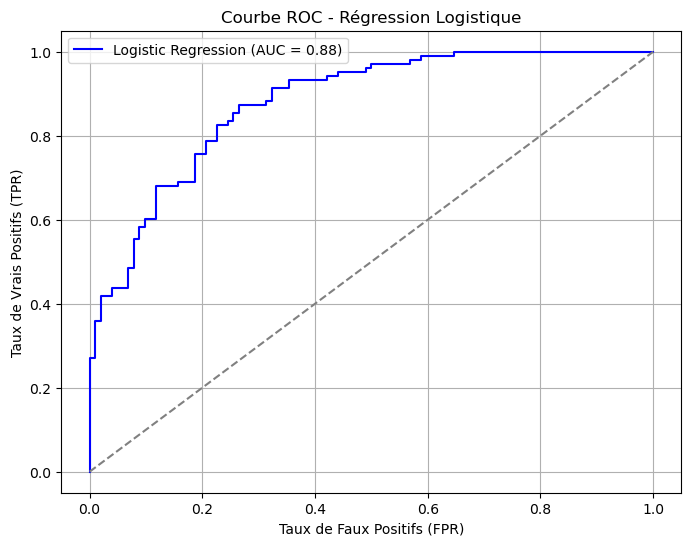

In [191]:
# 9. Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Ligne de chance
plt.title('Courbe ROC - Régression Logistique')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend()
plt.grid(True)
plt.show()

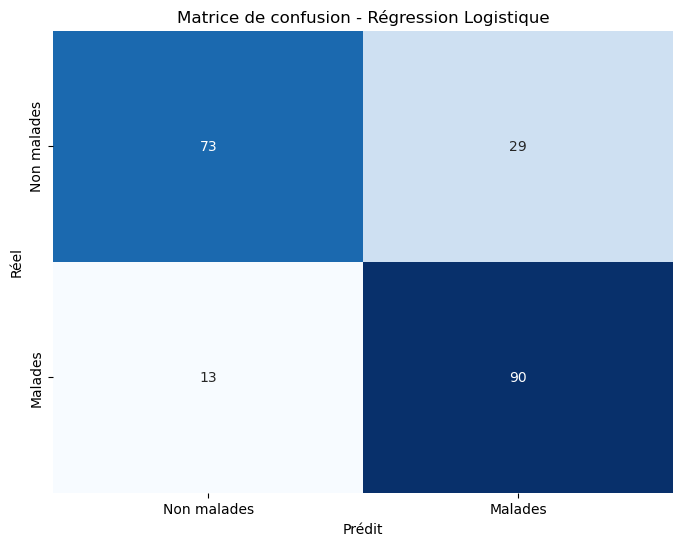

In [192]:
# 1. Faire des prédictions de classe (0 ou 1)
log_pred = log_model.predict(X_test_scaled)

# 2. Calculer la matrice de confusion
cm_log = confusion_matrix(y_test, log_pred)

# 3. Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Non malades", "Malades"], 
            yticklabels=["Non malades", "Malades"])
plt.title("Matrice de confusion - Régression Logistique")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

<div style="text-align: center;">
    <h2>K-Nearest Neighbors</h2>
</div>

In [193]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

In [194]:
X = df.drop('target', axis=1)  # Les caractéristiques
y = df['target'] 

In [195]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [196]:
# Normalisation des données (Standardisation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [197]:
from xgboost import XGBClassifier

In [198]:
param_grid_knn = {'n_neighbors': range(3, 15)}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='roc_auc')
grid_knn.fit(X_train_res, y_train_res)
best_knn = grid_knn.best_estimator_


In [199]:
# Entraînement du modèle KNN
knn = KNeighborsClassifier(n_neighbors=5)  # Vous pouvez ajuster le nombre de voisins (k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [200]:
# Faire des prédictions sur les données de test
y_pred_knn = knn.predict(X_test_scaled)

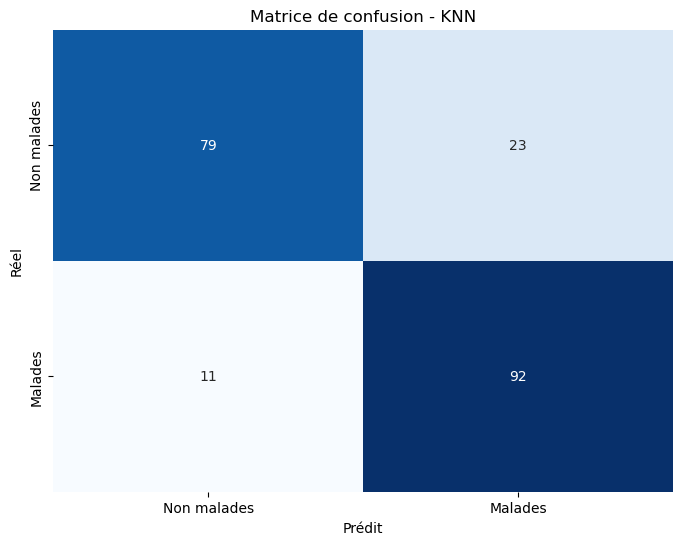

In [201]:
# Calculer la matrice de confusion
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Non malades", "Malades"], 
            yticklabels=["Non malades", "Malades"])
plt.title("Matrice de confusion - KNN")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

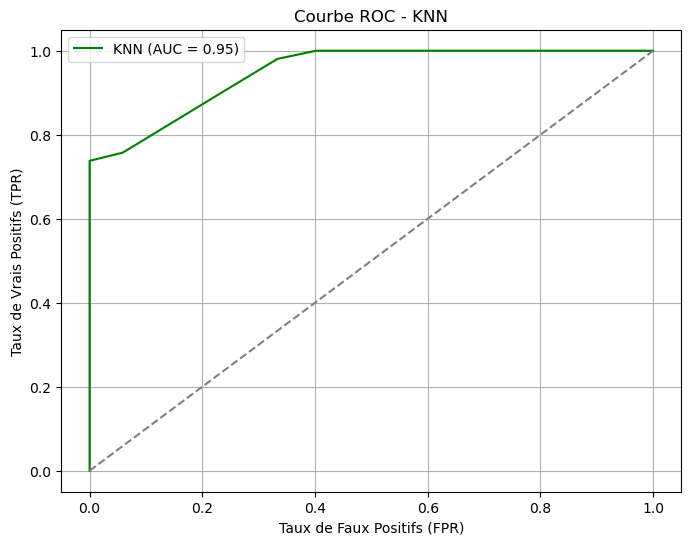

In [202]:
# Calcul des probabilités pour la courbe ROC
knn_probs = knn.predict_proba(X_test_scaled)[:, 1]  # Probabilités pour la classe "1"

# Calcul des taux de faux positifs et vrais positifs
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)

# Calcul du score AUC
auc_knn = roc_auc_score(y_test, knn_probs)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='green', label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Ligne de chance
plt.title('Courbe ROC - KNN')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend()
plt.grid(True)
plt.show()

In [203]:
# Affichage du rapport de classification
print("Rapport de classification KNN :")
print(classification_report(y_test, y_pred_knn))

Rapport de classification KNN :
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       102
           1       0.80      0.89      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



<div style="text-align: center;">
    <h2>Decision Tree</h2>
</div>

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [205]:
# Séparation des données en train et test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
# Normalisation des données (Standardisation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [207]:
# Création du modèle Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

In [208]:

# Entraînement du modèle
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [209]:
# Prédictions sur l'ensemble de test
y_pred = dt_model.predict(X_test_scaled)

In [210]:
# Calcul des probabilités pour AUC et courbe ROC
y_prob = dt_model.predict_proba(X_test_scaled)[:, 1]

# **1. Matrice de Confusion**

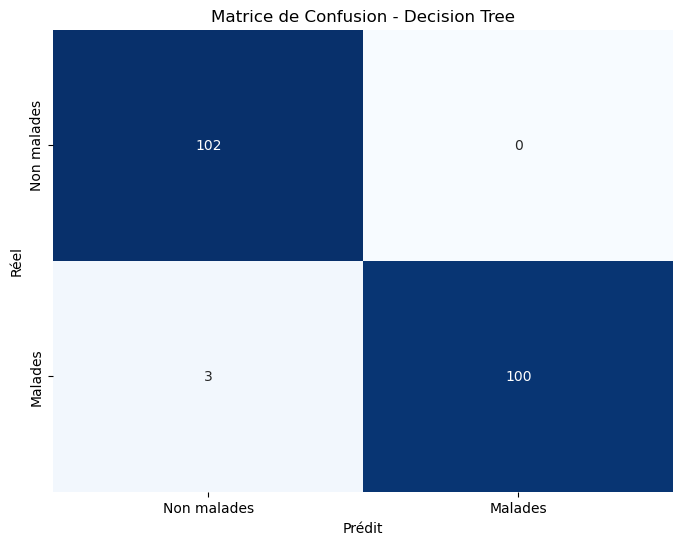

In [211]:
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Non malades", "Malades"], 
            yticklabels=["Non malades", "Malades"])
plt.title("Matrice de Confusion - Decision Tree")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# **2. Rapport de classification (precision, rappel, f1-score)**

In [212]:
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Rapport de classification :
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# **3. Score AUC**

Score AUC : 0.99


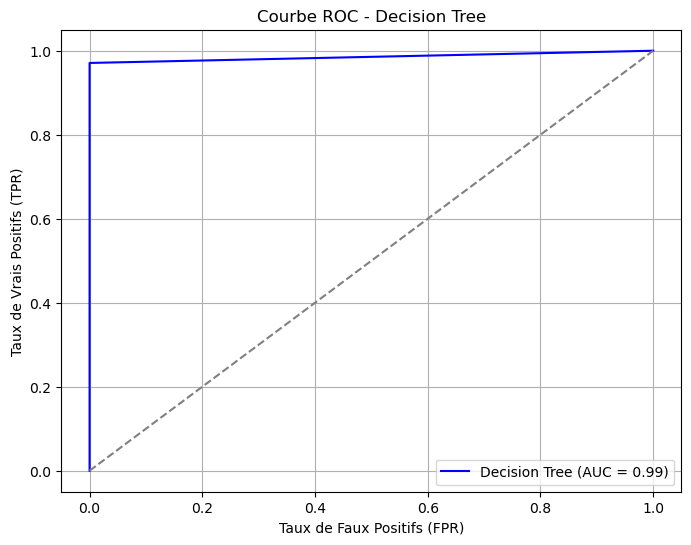

In [213]:
auc_score = roc_auc_score(y_test, y_prob)
print(f"Score AUC : {auc_score:.2f}")

# **4. Courbe ROC**
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Decision Tree (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Ligne de chance
plt.title('Courbe ROC - Decision Tree')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend()
plt.grid(True)
plt.show()

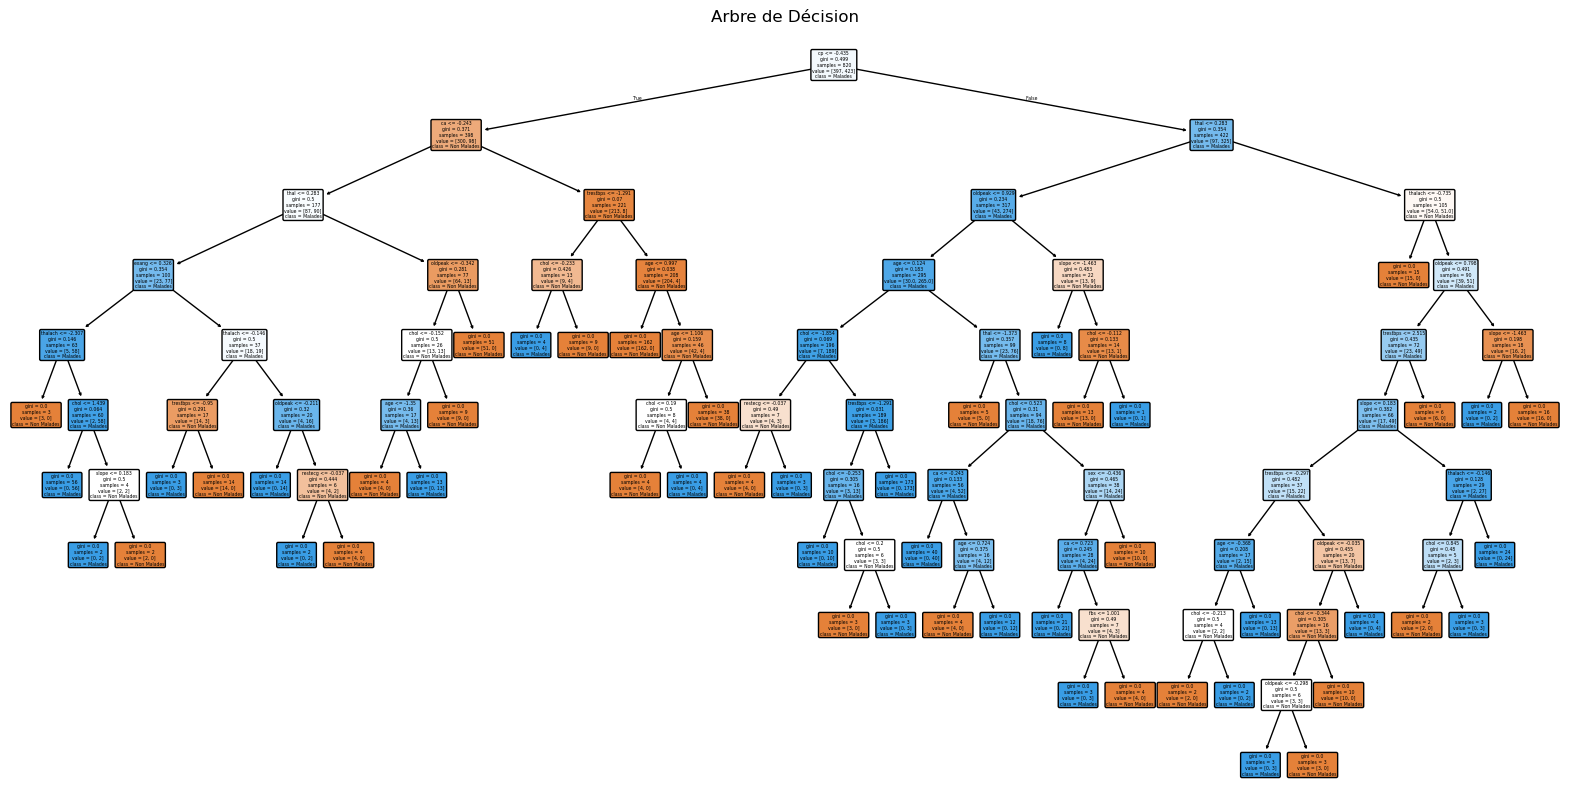

In [214]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Non Malades', 'Malades'], rounded=True)
plt.title("Arbre de Décision")
plt.show()


<div style="text-align: center;">
    <h2>Random Forest</h2>
</div>

In [215]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [216]:
X = df.drop('target', axis=1)  # Les caractéristiques
y = df['target'] 

In [217]:
# Diviser en ensembles d'entraînement et de test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [219]:
# Création du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [220]:
# Entraînement du modèle
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [221]:
# Prédictions sur l'ensemble de test
y_pred_rf = rf_model.predict(X_test_scaled)

# Prédictions de probabilités pour la courbe ROC
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

In [222]:
# AUC - Calcul du score
auc_score_rf = roc_auc_score(y_test, rf_probs)

In [223]:
# Matrice de confusion
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Rapport de classification
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



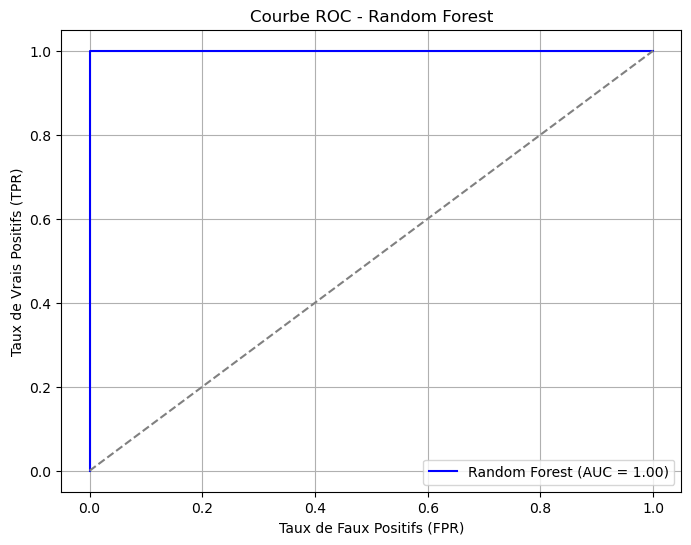

In [224]:
# Affichage de la courbe ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {auc_score_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Ligne de chance
plt.title('Courbe ROC - Random Forest')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend()
plt.grid(True)
plt.show()

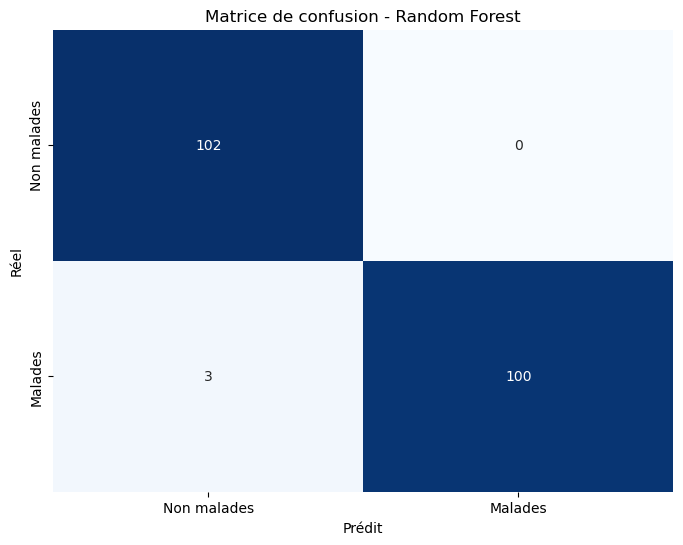

In [225]:
# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Non malades", "Malades"], 
            yticklabels=["Non malades", "Malades"])
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

In [226]:
from sklearn.model_selection import cross_val_score

# Validation croisée sur le modèle
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='roc_auc')
print("Scores AUC de la validation croisée : ", cv_scores)
print("Score moyen AUC de la validation croisée : ", cv_scores.mean())

Scores AUC de la validation croisée :  [1.         1.         1.         1.         0.99885649]
Score moyen AUC de la validation croisée :  0.9997712978845055


<div style="text-align: center;">
    <h2>SVM: Support Vector Machine</h2>
</div>

In [227]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve

In [228]:
X = df.drop('target', axis=1)  # Les caractéristiques
y = df['target']

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [231]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

In [232]:
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [233]:
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]

AUC Score (SVM) : 0.96


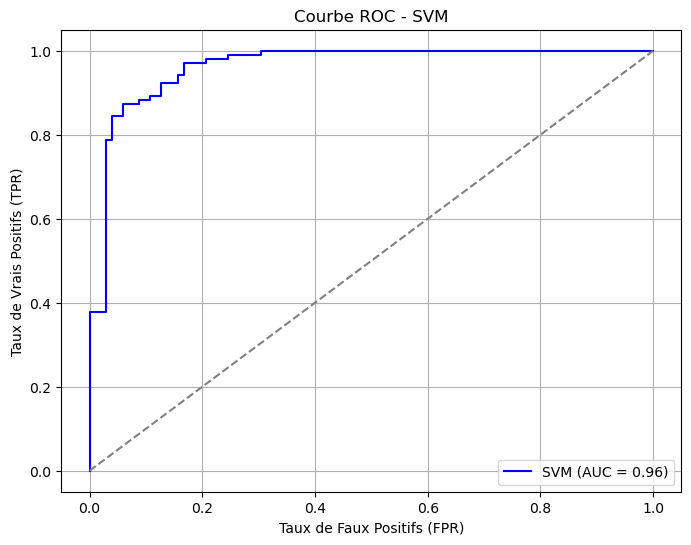

In [234]:
# Calculer l'AUC
auc_score_svm = roc_auc_score(y_test, svm_probs)
print(f'AUC Score (SVM) : {auc_score_svm:.2f}')

# Afficher la courbe ROC
fpr, tpr, _ = roc_curve(y_test, svm_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'SVM (AUC = {auc_score_svm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Ligne de chance
plt.title('Courbe ROC - SVM')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend()
plt.grid(True)
plt.show()

In [235]:
svm_pred = svm_model.predict(X_test_scaled)

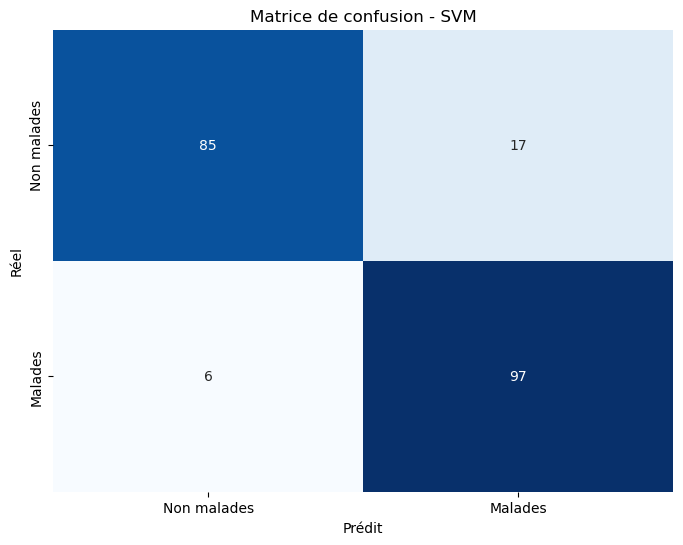

In [236]:
cm_svm = confusion_matrix(y_test, svm_pred)

# 11. Afficher la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Non malades", "Malades"], 
            yticklabels=["Non malades", "Malades"])
plt.title("Matrice de confusion - SVM")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

In [237]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205



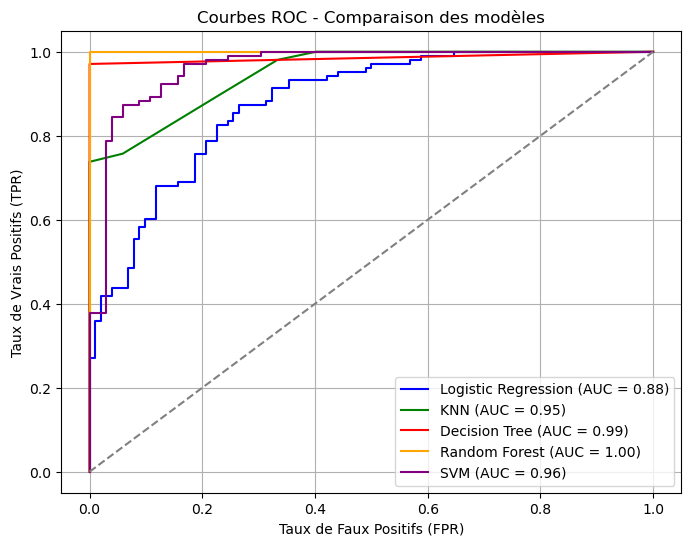

In [238]:
# Tracer les courbes ROC de tous les modèles

# Calcul des taux de faux positifs et vrais positifs pour chaque modèle
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)

# Calcul du score AUC pour chaque modèle
auc_log = roc_auc_score(y_test, log_probs)
auc_knn = roc_auc_score(y_test, knn_probs)
auc_dt = roc_auc_score(y_test, y_prob)
auc_rf = roc_auc_score(y_test, rf_probs)
auc_svm = roc_auc_score(y_test, svm_probs)

# Affichage des courbes ROC
plt.figure(figsize=(8, 6))

# Courbe ROC de la régression logistique
plt.plot(fpr_log, tpr_log, color='blue', label=f'Logistic Regression (AUC = {auc_log:.2f})')
# Courbe ROC du KNN
plt.plot(fpr_knn, tpr_knn, color='green', label=f'KNN (AUC = {auc_knn:.2f})')
# Courbe ROC de l'arbre de décision
plt.plot(fpr_dt, tpr_dt, color='red', label=f'Decision Tree (AUC = {auc_dt:.2f})')
# Courbe ROC du Random Forest
plt.plot(fpr_rf, tpr_rf, color='orange', label=f'Random Forest (AUC = {auc_rf:.2f})')
# Courbe ROC du SVM
plt.plot(fpr_svm, tpr_svm, color='purple', label=f'SVM (AUC = {auc_svm:.2f})')

# Ligne de chance (random guess)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Titres et labels
plt.title('Courbes ROC - Comparaison des modèles')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend()
plt.grid(True)
plt.show()


| Modèle                           | AUC Score |
| -------------------------------- | --------- |
| **Régression Logistique**        | 0.88      |
| **K-Nearest Neighbors (KNN)**    | 0.95      |
| **Decision Tree**                | 0.99      |
| **Random Forest**                | 1.00      |
| **SVM (Support Vector Machine)** | 0.96      |


In [241]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Entraînement du modèle
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Sauvegarde du modèle et du scaler
joblib.dump(rf_model, 'random_forest_aya.pkl')  # Ajout de l'extension .pkl
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']